<a href="https://colab.research.google.com/github/EricAndradeNJIT/data-analytics-folder/blob/main/Logistic_Regression_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer.csv


In [2]:
#import packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

In [3]:
#read and rename data

cancer = pd.read_csv('cancer.csv')

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [4]:
#convert diagnosis into numerical data type

cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,cancer_present
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1.0


In [6]:
#slit data and feature of interest

y = cancer['cancer_present']

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean']]

In [9]:
#split data into training/validation dataset and test dataset

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
#split training/validation dataset into a training and validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 

In [18]:
#initiate logistic regression

log_reg = LogisticRegression(random_state=0)

log_reg_model = log_reg.fit(X_train, y_train)


ValueError: ignored

In [19]:
#check missing data in vector 

y_train.isna().sum()

0

In [20]:
#check missing data in matrix

X_train.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           2
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             1
fractal_dimension_mean    2
dtype: int64

In [21]:
#impute missing data

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_ = imp_mean.fit_transform(X_train)
                                  
X_train = pd.DataFrame(X_train_)

print(X_train.isna().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [22]:
#try to initiate logistic regression again with new set

log_reg = LogisticRegression(random_state=0)

log_reg_model = log_reg.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Calculate accuracy

accuracy = log_reg_model.score(X_train, y_train)

In [24]:
#Calculate precision and recall

probs = pd.DataFrame(log_reg_model.predict_proba(X_train))
classes = pd.DataFrame(log_reg_model.predict(X_train))


precision = precision_score(y_train, classes)
recall = recall_score(y_train, classes)

Text(0.5, 1.0, 'ROC Curve')

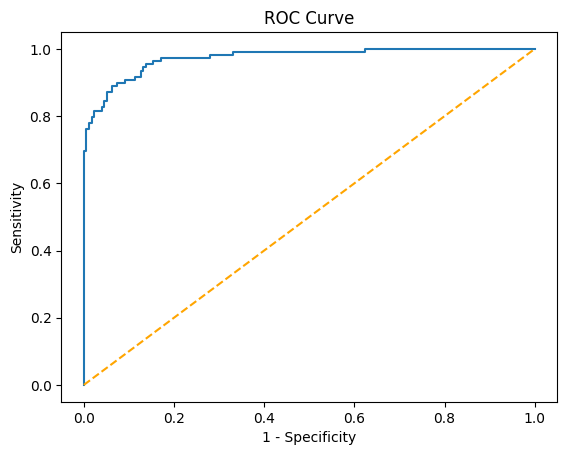

In [25]:
#Draw ROC curve

fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])


fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)

plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

In [26]:
#Compute AUC

auc = auc(fpr_, tpr_)


In [27]:
#Print results
print('The model accuracy is', accuracy)
print('The model precision is', precision)
print('The model recall is', recall)
print('The model AUC is', auc)

The model accuracy is 0.9084507042253521
The model precision is 0.9191919191919192
The model recall is 0.8348623853211009
The model AUC is 0.9732634338138925


The model with more features is more accurate predicting tumors as bening or malignant.